The following are the pre-requite packages that need to be import
 -constants is a .py file that stores all the coins and has been call in the wallet.py file
 -subprocess is use to run the commnand line using python, this basically make connection between python and terminal 
 -Web3 connect the bitcoin network 
 -eth_account and PrivateKeyTestnet connects with wallet account using the private key


In [11]:
import sys
from constants import *
from dotenv import load_dotenv
import subprocess
import json
import os
from web3 import Web3
from eth_account import Account
from bit import PrivateKeyTestnet
from bit.network import NetworkAPI
from pathlib import Path

The following code will get the mnemonic variable store as environmental variable

In [12]:
load_dotenv()
filepath= Path(r'C:\Python\.env')
mnemonic = os.getenv('MNEMONIC')

The following function will derive the private and public address for our wallet. The parameters are our wallet mnemonic key and prefered coin 

In [13]:
# Define function to derive wallet
def derive_wallets(mnemonic, coin, numderive):
    command = 'php ./hd-wallet-derive/hd-wallet-derive.php -g --mnemonic="' + mnemonic + '" --cols=path,address,privkey,pubkey --coin="' + coin + '" --numderive="' + str(numderive) + '"   --format=json'  
    #command = 'php ./hd-wallet-derive/hd-wallet-derive.php -g --mnemonic="' + mnemonic + '" --cols=path,address,privkey,pubkey --coin="' + coin + '" --numderive=1 --format=json'
    p = subprocess.Popen(command, stdout=subprocess.PIPE, shell=True)
    (output, err) = p.communicate()
    keys = json.loads(output)
    return  keys

In [24]:
coins = {"btc","btc-test","eth"}
numderives = 1

Output of the derive wallet

In [25]:
keys = {}
for coin in coins:
    keys[coin]= derive_wallets(mnemonic, coin, numderives)

print(json.dumps(keys,indent=1))  

{
 "btc-test": {
  "path": "m/44'/1'/0'/0/0",
  "address": "mgrz2d6V5toBrNYZ67BcV7Q3dH6jCxrKjG",
  "privkey": "cUZhpAdHaFfSgh1DMWaKZjq5wjC1Gae4ngBT28faYNhDug3KiSSk",
  "pubkey": "022d445957f3f7c4347da237e78841ecc66edcf4a1a5846efc97a859a2f58c376d"
 },
 "eth": {
  "path": "m/44'/60'/0'/0/0",
  "address": "0xde751001593B0429f2F1BDb6acdD51D6Fd30DACf",
  "privkey": "0xfbb1a06ea4b2850cb9c90b11c1a5d9ae8a0d49d92f5ec725883cddf2cb898ca7",
  "pubkey": "036ee6868e7090cd35f6ae094cf222a1c3d242d7602e1f736803ec39a3e9403a57"
 },
 "btc": {
  "path": "m/44'/0'/0'/0/0",
  "address": "1Fpe3qbkwfGaMbSG1M4h4LUJEinMQf9zZx",
  "privkey": "KyDVx3i25SJrRDe2PmfJAXghyouyg3jikaBTe6KABRYGSxwrPFNh",
  "pubkey": "02c845bdae6692e4635d8df6503d8e3e29a07596b11bfddd2b34b4af8a4cd0d3eb"
 }
}


The following code connects our wallet using the private key to unlock it, and shows the corresponding public address associated with it

In [16]:
abs_path = Path(r'C:\Python\.env')
private_key = os.getenv("PRIVATE_KEY")

private_key = "PRIVATE_KEY"
w3 = Web3(Web3.HTTPProvider("http://127.0.0.1:8545"))
#w3.middleware_onion.inject(geth_poa_middleware, layer=0)

account_one = Account.from_key(private_key)
print(account_one.address)

0x474d5856828462365a665964DF5B950e2718D333


create_raw_tx function basically helps to access the recipent account details which is define within "from"

send_tx function basically execute the transaction; account is the sender address which is stored in account_one variable and receipent is the public address of the reciver.

In [17]:
def create_raw_tx(account, recipient, amount):
    gasEstimate = w3.eth.estimateGas(
        {"from": account.address, "to": recipient, "value": amount}
    )
    return {
        "from": account.address,
        "to": recipient,
        "value": amount,
        "gasPrice": w3.eth.gasPrice,
        "gas": gasEstimate,
        "nonce": w3.eth.getTransactionCount(account.address),
        #"nonce": w3.eth.getTransactionCount(account.address, 'pending')
    }


def send_tx(account, recipient, amount):
    tx = create_raw_tx(account, recipient, amount)
    signed_tx = account.sign_transaction(tx)
    result = w3.eth.sendRawTransaction(signed_tx.rawTransaction)
    print(result)
    return result.hex()

This will give the account balance of the wallet, be mindful to the run the blockchain in the background

In [31]:
print(w3.eth.getBalance("0x474d5856828462365a665964DF5B950e2718D333"))

The following code use the function send_tx to execute the transaction

In [27]:
send_tx(account_one,"0x474d5856828462365a665964DF5B950e2718D333",1)

Pass the address of the transaction detail to get the receipt of the transaction 

In [28]:
w3.eth.getTransactionReceipt('0x322f20ac09976511bb2b3349c7c6cb5909325cd2f9cc29a22d6e8d6e968a73bf')

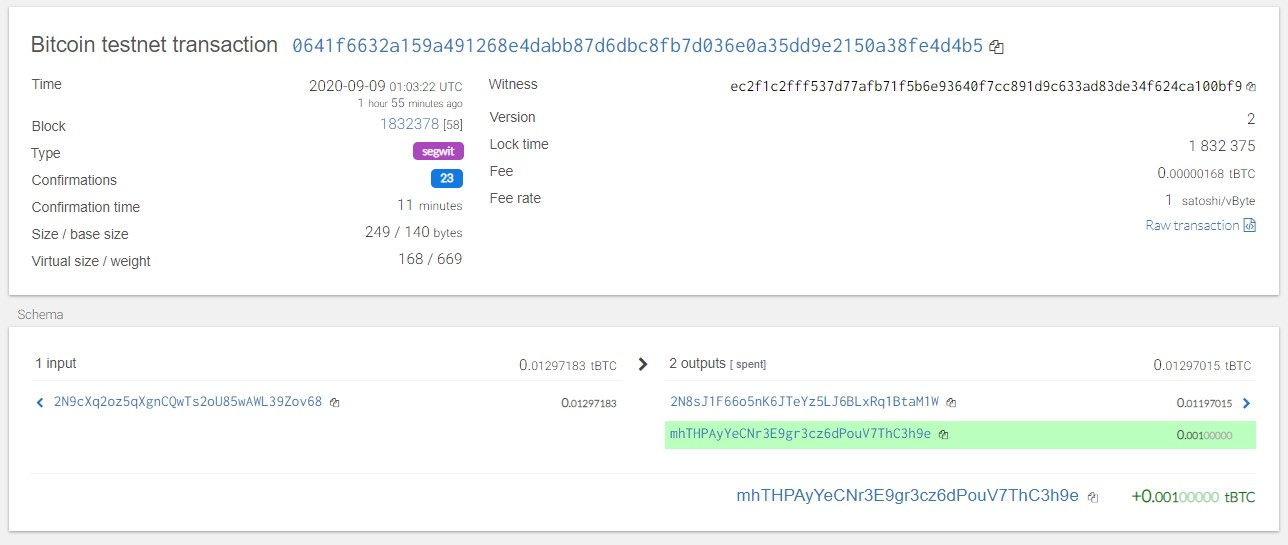

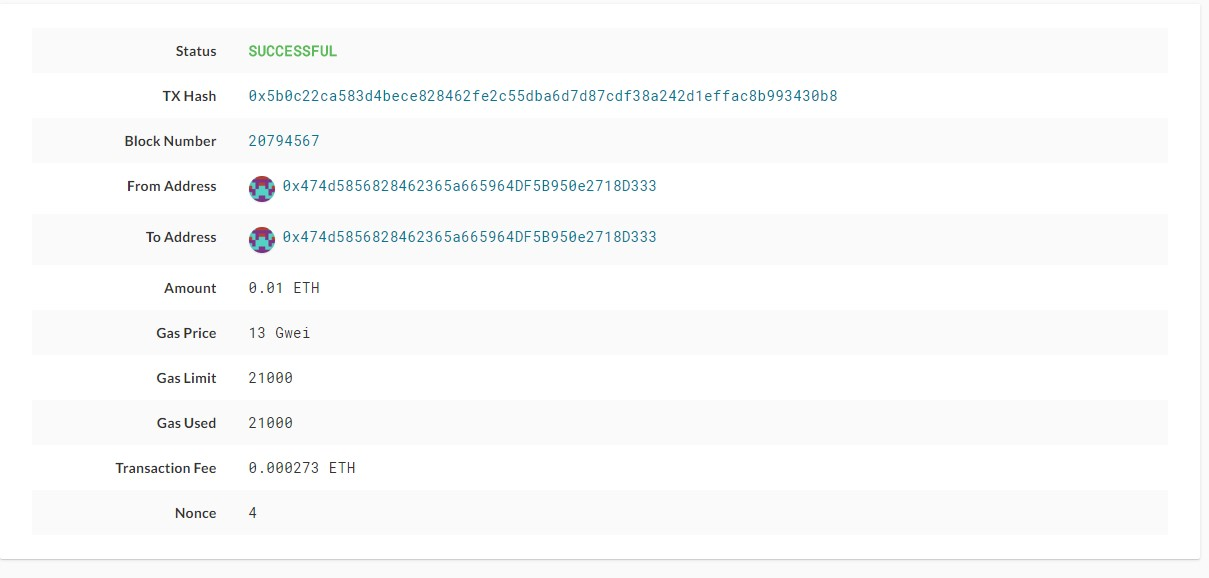

## Short Description about wallet

HD Wallet is a like a password manager that derives large amounts of public/private key pairs from same single seed phrase. 
This help to hold multiple wallet for the same coin in a single master wallet. This has been desing and implemented for BIP32 and BIP44 